# PROYECTO 11: Comportamiento de los usuarios en tienda online
**DESCRIPCION**
Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

## Descripción de los datos
Cada entrada de registro es una acción de usuario o un evento.

* EventName : nombre del evento.
* DeviceIDHash: identificador de usuario unívoco.
* EventTimestamp: hora del evento.
* ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

## Abrir el archivo de datos y leer la información general

### Importación de librerías

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data= pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')


### Importación de datos

In [3]:
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


## Preparar los datos

### Cambiar nombre de las columnas 

In [4]:
data.columns=['evento','user_id','fecha','Prueba']

### Comprobar datos ausentes y corregir tipo de datos si es necesario

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   evento   244126 non-null  object
 1   user_id  244126 non-null  int64 
 2   fecha    244126 non-null  int64 
 3   Prueba   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


La columna Timestamps(marcas de tiempo) esta en un formato de fecha de la epoca Unix.
* convertir la columna fecha a objeto datetime
* No hay valores ausentes
* Verificar si hay duplicados

In [6]:
# Convierte la columna 'fecha' de timestamp a datetime
data['fecha'] = pd.to_datetime(data['fecha'], unit='s')

In [7]:
# verificar si hay duplicado
info_duplicado=data.duplicated().sum()
print(f'Tienes {info_duplicado} duplicados')
 # se procedera a eliminar los duplicados y mantener la primera aparición 
data=data.drop_duplicates()
data

Tienes 413 duplicados


,evento,user_id,fecha,Prueba
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


### Agregar una columna de fecha y hora , y una columna separada para las fechas

In [8]:
# Extrae solo la fecha
data['date']=data['fecha'].dt.date
# Extrae solo la hora en formato 'HH:MM:SS'
data['hora'] = data['fecha'].dt.strftime('%H:%M:%S')
# Asegúrar de que 'date' esté en formato datetime
data['date'] = pd.to_datetime(data['fecha']).dt.normalize()

/tmp/ipykernel_257/2827123356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=data['fecha'].dt.date
/tmp/ipykernel_257/2827123356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hora'] = data['fecha'].dt.strftime('%H:%M:%S')
/tmp/ipykernel_257/2827123356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [9]:
# Verificar la columnas agregadas
data

,evento,user_id,fecha,Prueba,date,hora
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


## Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros?

In [10]:

print(f'Numero de eventos totales es {len(data)}')
data.groupby('evento')['user_id'].nunique()


Numero de eventos totales es 243713


evento
CartScreenAppear           3749
MainScreenAppear           7439
OffersScreenAppear         4613
PaymentScreenSuccessful    3547
Tutorial                    847
Name: user_id, dtype: int64

Son 5 eventos que realizan los usuarios

### ¿Cuántos usuarios y usuarias hay en los registros?

In [11]:
print(f'Hay {data["user_id"].nunique()} usuarios unicos.')

Hay 7551 usuarios unicos.


In [12]:
print(f'Un usuario promedio tiene {round(data.groupby("user_id")["evento"].count().mean(),4)} eventos durante el experimento.')


Un usuario promedio tiene 32.2756 eventos durante el experimento.


### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.

In [13]:
data.groupby('date').agg({'evento':'count'})

,evento
date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554



Fecha min :2019-07-25 00:00:00
Fecha max :2019-08-07 00:00:00 



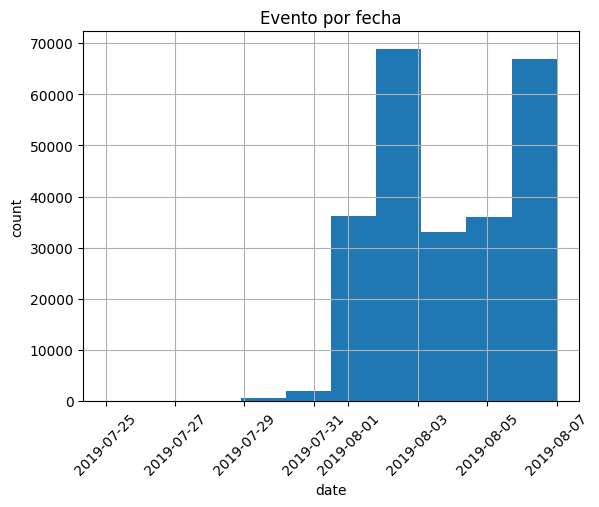

In [14]:
print(f"""
Fecha min :{data["date"].min()}
Fecha max :{data["date"].max()} 
""")
data['date'].hist()
plt.title('Evento por fecha')
plt.xlabel('date')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

* A partir del 1 de agosto hasta el 7  que realizaron mas eventos

### Traza un histograma por fecha y hora. 

(array([18102., 18104., 18106., 18108., 18109., 18111., 18113., 18115.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

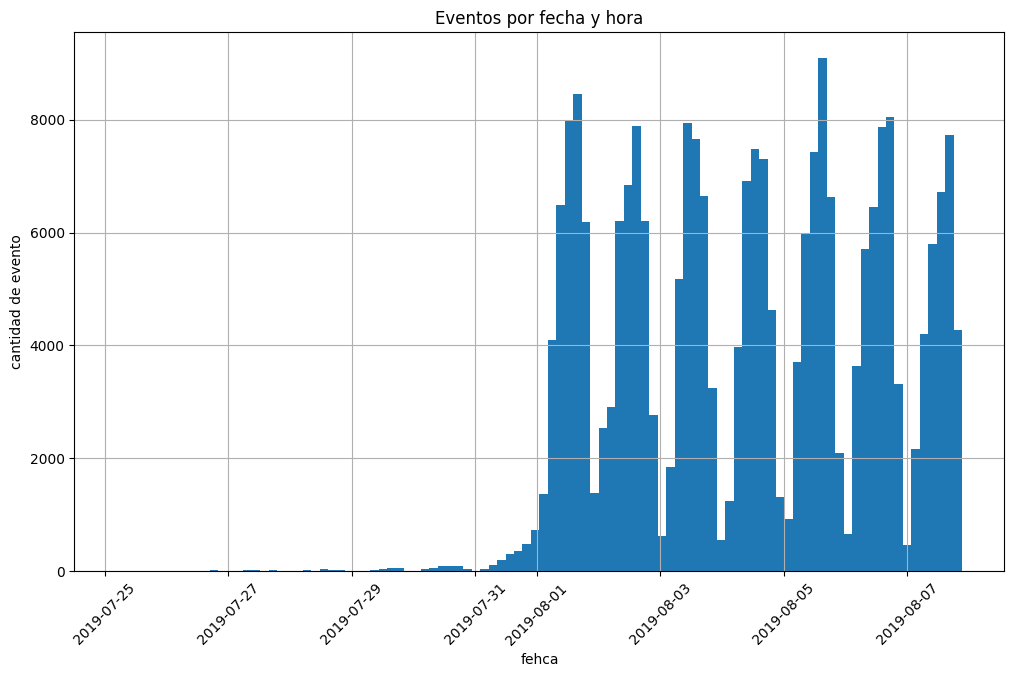

In [15]:
plt.figure(figsize=(12,7))
data['fecha'].hist(bins=100)
plt.title('Eventos por fecha y hora')
plt.xlabel('fehca')
plt.ylabel('cantidad de evento')
plt.xticks(rotation=45)


### ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?
Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general.

* Puede que algunos usuarios no lograron terminar el proceso en la primera interación(en las primeras fechas).Es decir no habia muchos eventos.Para tener datos completos podemos empezar desde el 1 de agosto donde se puede mayor comportamiento de usuarios.

### Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [16]:
# Considerar los datos a partir del 01 de agosto
data_filtrado=data.query("date>='2019-08-01'")
data_filtrado

,evento,user_id,fecha,Prueba,date,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,00:08:59
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [17]:
# Calcular la diferencia
len(data) - len(data_filtrado)

2826

* Si se perdio una considerable cantidad de datos

In [19]:
len(data_filtrado)/len(data)

0.988404393692581

### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [20]:
df_grupo=data_filtrado.groupby('Prueba')['user_id'].nunique().reset_index()
df_grupo

,Prueba,user_id
0,246,2484
1,247,2513
2,248,2537


En cada prueba tiene casi la misma cantidad de usuarios que tuvieron interación

## Estudiar el embudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [21]:
registro_eventos=data_filtrado.groupby('evento')['user_id'].count().reset_index().sort_values(by='user_id',ascending=False)
registro_eventos.columns=['evento','count']
registro_eventos

,evento,count
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Se muestra el proceso del comportamiento del usuario

### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.

In [22]:

evento_por_cantUsuario=data_filtrado.groupby('evento')['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
evento_por_cantUsuario.columns=['evento','cant_user']
evento_por_cantUsuario['porcentaje_user']=evento_por_cantUsuario['cant_user'] / data_filtrado['user_id'].nunique()*100

evento_por_cantUsuario

,evento,cant_user,porcentaje_user
1,MainScreenAppear,7419,98.473586
2,OffersScreenAppear,4593,60.963632
0,CartScreenAppear,3734,49.561986
3,PaymentScreenSuccessful,3539,46.973719
4,Tutorial,840,11.149456


### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

'MainScreenAppear' : Página principal de la tienda.

**No siempre ocurre porque vemos que no se cumple el 100% de que los usuarios ingresaron primero a este paso.**

'OffersScreenAppear':Página de ofertas del momento.

**Normalmente por los anuncios los usuarios llegan primero a las promociones , porque hay mayor interes.**

'CartScreenAppear' :Carrito de compras previo al pago.

**Este proceso si debe cumplir una secuencia** 

'PaymentScreenSuccesful': La compra ha sido exitosa, paso final.

**Si debe ir antes al carrito para proceder el pago asi que si cumple una secuencia.**

'Tutorial' Es un tutorial de como comprar.

**Este paso no es obligatorio pero en esta prueba si dan este paso al ultimo de su compra.**

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).

In [23]:
evento_por_cantUsuario['proporcion_evento']=evento_por_cantUsuario['porcentaje_user']/evento_por_cantUsuario['porcentaje_user'].shift(1)
evento_por_cantUsuario['proporcion_evento']=evento_por_cantUsuario['proporcion_evento']*100
evento_por_cantUsuario

,evento,cant_user,porcentaje_user,proporcion_evento
1,MainScreenAppear,7419,98.473586,NaN
2,OffersScreenAppear,4593,60.963632,61.908613
0,CartScreenAppear,3734,49.561986,81.297627
3,PaymentScreenSuccessful,3539,46.973719,94.777718
4,Tutorial,840,11.149456,23.735519


### ¿En qué etapa pierdes más usuarios y usuarias?


* En la segunda etapa, hay una gran perdida de usuario a comparcion de la segunda etapa,con un 61% de los usuarios iniciales.
* En la etapa de compra un 23% de usuario que realizaron la compra se interesa ingresar a la ultima etapa (tutorial)

### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [24]:
(evento_por_cantUsuario['cant_user'].iloc[3] / evento_por_cantUsuario['cant_user'].iloc[0]) * 100

47.70184661005526

* Desde un inicio hay un proporcion de usuario que ingresaron y cuanto terminaron en el proceso de pago.Esta proporcion fue de un 47.7%

## Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [25]:
df_grupo=df_grupo.rename(columns={'user_id':'cant_usuario_prueba'})
df_grupo

,Prueba,cant_usuario_prueba
0,246,2484
1,247,2513
2,248,2537


* El grupo 248(B) tiene mayor cantidad de usuarios

### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [26]:
#Eliminamos los usuarios duplicados en cada prueba
conversions = data_filtrado[["user_id", "Prueba"]].drop_duplicates()

#Se creao una df de usuarios unicos que realizaron el pago
converted = pd.DataFrame(data={
    "user_id": data_filtrado[data_filtrado["evento"] == "PaymentScreenSuccessful"]["user_id"].unique(),
    "converted": 1
})
#unir ambas tablas
conversions = conversions.merge(converted, on="user_id", how="left")
conversions["converted"] = conversions["converted"].fillna(0)

conversions.head(10)


,user_id,Prueba,converted
0,3737462046622621720,246,1.0
1,1433840883824088890,247,0.0
2,4899590676214355127,247,1.0
3,1182179323890311443,246,0.0
4,4613461174774205834,248,1.0
5,205293431553451771,246,1.0
6,6121366368901703338,248,1.0
7,6022375714473447159,248,0.0
8,2712290788139738557,247,1.0
9,6049698452889664846,247,1.0


In [27]:
# Filtrar el df convertido por prueba
control_A1 = conversions[conversions['Prueba'] == 246]
control_A2 = conversions[conversions['Prueba'] == 247]
control_B = conversions[conversions['Prueba'] == 248]

In [28]:
#Hipotesis de la igualdad de las medias de cada grupo 246 y 247
stat, p_value = st.ttest_ind(
    control_A1["converted"],
    control_A2["converted"]
)

p_value

alpha = 0.05
if p_value < alpha:
    print("Si hay significancia")
else:
    print("No hay significancia estadística")
    
print(f"p-value: {p_value}")

No hay significancia estadística
p-value: 0.11461233163248476


### Selecciona el evento más popular. 


* el evento mas popular y logico el primer paso: MainScreenAppear

 ### En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción.Encuentra su proporción

In [29]:
mainscreen = data_filtrado[(data_filtrado['evento'] == 'MainScreenAppear') & (data_filtrado['Prueba'].isin([246, 247]))]
mainscreen_users = mainscreen.groupby('Prueba')['user_id'].nunique().reset_index()
mainscreen_users

,Prueba,user_id
0,246,2450
1,247,2476


In [30]:
mainscreen_users['proporcion'] = mainscreen_users['user_id'] / data_filtrado['user_id'].nunique()
mainscreen_users

,Prueba,user_id,proporcion
0,246,2450,0.325192
1,247,2476,0.328643


### Comprueba si la diferencia entre los grupos es estadísticamente significativa. Comprueba si la diferencia entre los grupos es estadísticamente significativa.

In [31]:
#Crear una columna de valores binarios(1, se realizo la acción, 0 : no )
data_filtrado['mainscreen_flag'] = data_filtrado['evento'].apply(lambda x: 1 if x == 'MainScreenAppear' else 0)

# Agrupar los datos por usuario para obtener un solo valor por usuario en cada grupo
group_246 = data_filtrado[data_filtrado['Prueba'] == 246].groupby('user_id')['mainscreen_flag'].max()
group_247 = data_filtrado[data_filtrado['Prueba'] == 247].groupby('user_id')['mainscreen_flag'].max()

# Realizar el t-test entre los dos grupos

import scipy.stats as stats
stat, p_value = st.ttest_ind(group_246, group_247)

#deteminamos alfa
alpha = 0.05

if p_value < alpha:
    print("Si hay significancia")
else:
    print("No hay significancia estadística")
print(f"""
Statistic: {stat}
p-value: {p_value}
""")

No hay significancia estadística

Statistic: 0.30928523442542466
p-value: 0.7571174621103072



/tmp/ipykernel_257/4201238275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['mainscreen_flag'] = data_filtrado['evento'].apply(lambda x: 1 if x == 'MainScreenAppear' else 0)


### Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [32]:
# Se realizara una funcion para probar las hipotesis
def test_event_proportions_ttest(df_ago, tipo_evento, group1, group2):
    # Crear columnas con valores 1 y 0
    data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
    
    # Agrupar los datos por usuario para obtener un solo valor por usuario en cada grupo(2 grupo de comparación)
    group1_data = data_filtrado[data_filtrado['Prueba'] == group1].groupby('user_id')['event_example'].max()
    group2_data = data_filtrado[data_filtrado['Prueba'] == group2].groupby('user_id')['event_example'].max()
    
    # Realizar el t-test entre los dos grupos
    stat, p_value = st.ttest_ind(group1_data, group2_data)
     #deteminamos que el alpha se dividira entre el numero de pruebas
    alpha = 0.05 /20 # ya que en las siguiente prueba se compara grupos(4*5)
    print(f"Evento: {tipo_evento}") 
    print(f"Statistic: {stat}")
    print(f"p-value: {p_value}")
    if p_value < alpha:
        print("Si hay significancia")
    else:
        print("No hay significancia estadística")

* Son 5 eventos pero se compara entre los 3 grupos , 2 grupos de control se tomara como un solo grupo

In [33]:
# se crea una lista de los eventos
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
for evento in eventos:
    test_event_proportions_ttest(data_filtrado, evento, 246, 247)

/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Evento: MainScreenAppear
Statistic: 0.30928523442542466
p-value: 0.7571174621103072
No hay significancia estadística
Evento: OffersScreenAppear
Statistic: 1.154910721737677
p-value: 0.24818223444867904
No hay significancia estadística
Evento: CartScreenAppear
Statistic: 1.203302101112663
p-value: 0.22891646330485427
No hay significancia estadística
Evento: PaymentScreenSuccessful
Statistic: 1.5780722647036525
p-value: 0.11461233163248476
No hay significancia estadística
Evento: Tutorial
Statistic: -0.07814586418903402
p-value: 0.9377151544645461
No hay significancia estadística


/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)


### Haz lo mismo para el grupo con fuentes alteradas. 

### Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. 

In [34]:
#Corremos nuevamente la función, ahora comparando cada grupo de control con el experimental
#Grupo 246 y 248
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
for evento in eventos:
    test_event_proportions_ttest(data_filtrado, evento, 246, 248)

/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Evento: MainScreenAppear
Statistic: 1.0471820148439273
p-value: 0.2950660646567914
No hay significancia estadística
Evento: OffersScreenAppear
Statistic: 1.2580298446630087
p-value: 0.20843948636199391
No hay significancia estadística
Evento: CartScreenAppear
Statistic: 1.7600660335120504
p-value: 0.0784575175226791
No hay significancia estadística
Evento: PaymentScreenSuccessful
Statistic: 1.2473326540860652
p-value: 0.2123337471133262
No hay significancia estadística
Evento: Tutorial
Statistic: 0.219240632444837
p-value: 0.8264715202653616
No hay significancia estadística


/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)


In [35]:
#Corremos nuevamente la función, ahora comparando cada grupo de control con el experimental
#Grupo 247 y 248
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
for evento in eventos:
    test_event_proportions_ttest(data_filtrado, evento, 247, 248)

/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Evento: MainScreenAppear
Statistic: 0.7408738714939229
p-value: 0.45880437959723175
No hay significancia estadística
Evento: OffersScreenAppear
Statistic: 0.10068875836751069
p-value: 0.9198015341631126
No hay significancia estadística
Evento: CartScreenAppear
Statistic: 0.5553088766823087
p-value: 0.5787080147829398
No hay significancia estadística
Evento: PaymentScreenSuccessful
Statistic: -0.3353132695021712
p-value: 0.7374027184332623
No hay significancia estadística
Evento: Tutorial
Statistic: 0.29844044394554403
p-value: 0.7653793082832738
No hay significancia estadística


/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)


### Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [36]:
#Corremos nuevamente la función, ahora comparando los grupos de control con el experimental
eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
for evento in eventos:
    test_event_proportions_ttest(data_filtrado, evento, 246 and 247, 248)

/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Evento: MainScreenAppear
Statistic: 0.7408738714939229
p-value: 0.45880437959723175
No hay significancia estadística
Evento: OffersScreenAppear
Statistic: 0.10068875836751069
p-value: 0.9198015341631126
No hay significancia estadística
Evento: CartScreenAppear
Statistic: 0.5553088766823087
p-value: 0.5787080147829398
No hay significancia estadística
Evento: PaymentScreenSuccessful
Statistic: -0.3353132695021712
p-value: 0.7374027184332623
No hay significancia estadística
Evento: Tutorial
Statistic: 0.29844044394554403
p-value: 0.7653793082832738
No hay significancia estadística


/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)
/tmp/ipykernel_257/2813179359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['event_example'] = data_filtrado['evento'].apply(lambda x: 1 if x == tipo_evento else 0)


### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? 

* Inicialmente consideré dicha corrección como 0.05/5 ya que al correr la función se ejecutaba 5 veces por prueba(Eventos)

### Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

* Se ha realizado 20 pruebas. Para realizar las pruebas multiples se ha tomado los 5 eventos diferentes para 3 muestras (2 grupos de control y una prueba).Los grupos de control se tomaron como grupo independiente .Por el cual el numero de pruba fueron 15 pero los grupos de control se tomó como uno solo y en total se añadio 5 pruebas mas. 
En total se realizó 20 pruebas .
* Se tomo el metodo mas conocido el de 'Bonferroni'.Por el cual se dividió 0.05 / 20 (0.0025) , y tener menor probabilidad de obterner falso positivos,Porque con cada prueba aumentaria cada prueba y no estaria arrojando una informacion o conclusion verdadera.
Pero no hay una diferencia cambiando el alpha .Los resultados se mantiene.

## Conclusiones

* Se han tomado igual de proporcion de usuarios unicos en cada grupo
* Al estar familiarizado los usuarios revisan constatntemente la pagina y posiblemente las oferta.
* Entre la etapa del usuario al entrar a la pagina principal para ir a ver las ofertas hay mayor desinterés.en una perdiad de 30% de usuarios que no sigue ese paso.Finalmente los qu compra la mayoria se queda conforme con su compra y no ve el tutorial.un 80% de los usuarios que realiza la compra se retira.
* Se han tomado 3 grupos para las pruebas multiples de cada eventos y tomado el ajuste necesario de los p.value y haber realizado la pruebas test A/A/B  NO HAY UNA CAMBIO SIGNIFICATIVO entre los grupos por el cual se puede aprobar el cambio de diseño de las fuentes.No perderia o no habria cambio del comportamiento de los usuarios.